In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import skimage
from skimage import util
import skimage.io as io
from skimage import exposure
import cv2 as cv

import sys
from skimage.morphology import remove_small_objects

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
SideLight_42835=io.imread("../data/42835_chanel_1_SideLight_corrected_GaussSmooth.tif")
BottomLight_42835=io.imread("../data/42835_chanel_2_BottomLight_corrected_GaussSmooth.tif")

images_dict_42835={"SideLight":SideLight_42835,
             "BottomLight":BottomLight_42835}

# Summary
For Omero 42835 time serie we tried several thresholds from the standard scikit-image package: Multi Outsu, Triangle, Mean,Local gaussian.

For comparison we selected region (ROI) and plot thresholding results for SideLight and BottomLight setting for 4 time frames (1 hour, 2 hour, 3 hour, 4 hour)

## ROI

Please see location of the ROI in respect to the full image below.

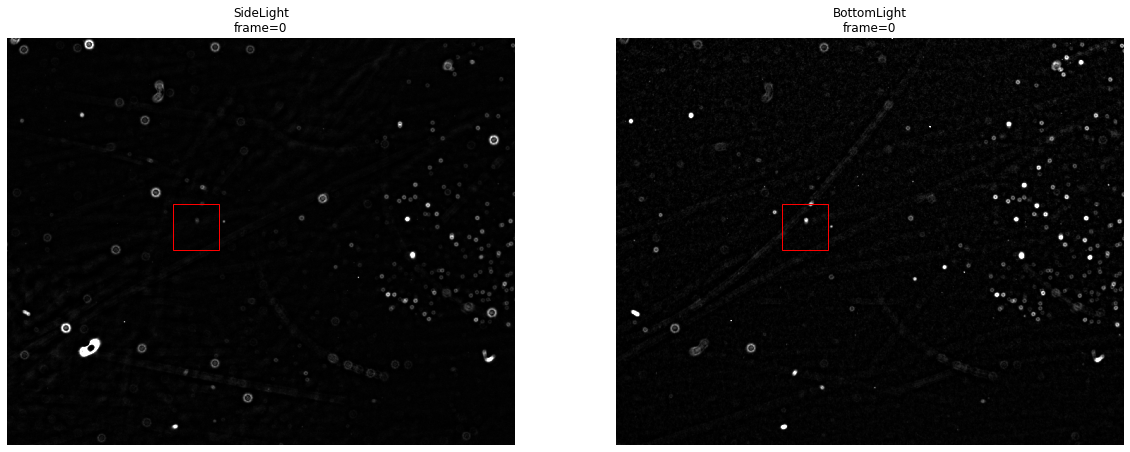

In [3]:
# ROI
Frame=0

# Create a Rectangle patch
# Rectangle xy, width, height
# Square ROI
patch={}
patch["row"]=900
patch["col"]=900
patch["width"]=250


def show_img_with_ROI(img,patch,ax,name):
    import matplotlib.patches as patches
    ax.imshow(img,vmin=0,vmax=np.quantile(img,0.999))
    rect = patches.Rectangle((patch["col"],patch["row"]),patch["width"],patch["width"],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.set_title(name)
    ax.axis("off")

def show_ROI(img,patch,ax,name):
    ax.imshow(img[patch["row"]:patch["row"]+patch["width"],patch["col"]:patch["col"]+patch["width"]],vmin=0,vmax=np.quantile(img,0.99))
    ax.set_title(name)
    ax.axis("off")

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,20))
colum_number=0

for (name,img_stack) in images_dict_42835.items():
    show_img_with_ROI(img_stack[Frame],patch,ax[colum_number],name+"\nframe="+str(Frame))
    #show_ROI(img_stack[Frame],patch,ax[1,colum_number],name+"\n ROI frame="+str(Frame))
    colum_number=colum_number+1


##  Segmentation for the 1 hour (frame=12)

In [4]:
Frame=12

In [5]:
def Multi_Outsu(img):
    from skimage.filters import threshold_multiotsu
    thresh =  threshold_multiotsu(img,classes=3)
    binary = np.where(img > thresh[0],1.0,0.0)
    return util.img_as_ubyte(binary)

def Triangle(img):
    from skimage.filters import threshold_triangle
    thresh = threshold_triangle(img)
    #print(thresh)
    binary = np.where(img > thresh,1.0,0.0)
    #print(binary.dtype)
    return util.img_as_ubyte(binary)

def Mean_th(img):
    from skimage.filters import threshold_mean
    thresh = threshold_mean(img)
    binary = np.where(img > thresh,1.0,0.0)
    return util.img_as_ubyte(binary)

def Local_gauss(img,window_size=101):
    from skimage.filters import threshold_local
    binary= img > threshold_local(img, window_size, 'gaussian',offset=-2)
    return util.img_as_ubyte(binary)


def show_ROI_threhold(img,patch,ax,name):
    ax.imshow(img[patch["row"]:patch["row"]+patch["width"],patch["col"]:patch["col"]+patch["width"]],cmap='plasma')
    ax.set_title(name)
    ax.axis("off")
    
def plot_threshold_panel(img_dict,Frame):
    fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,10))
    plt.suptitle('OmeroID='+'42835'+'\n Frame='+str(Frame))
    
    row_number=0
    for (name,img_stack) in img_dict.items():
        img_select=img_stack[Frame]
        show_ROI(img_select,patch,ax[row_number,0],name+"\n ROI frame="+str(Frame))
        show_ROI_threhold(Multi_Outsu(img_select),patch,ax[row_number,1],name+"\n Threshold Multi_Outsu \n frame="+str(Frame))
        show_ROI_threhold(Triangle(img_select),patch,ax[row_number,2],name+"\n Threshold Triangle \n frame="+str(Frame))
        show_ROI_threhold(Mean_th(img_select),patch,ax[row_number,3],name+"\n Threshold Mean \n frame="+str(Frame))
        show_ROI_threhold(Local_gauss(img_select),patch,ax[row_number,4],name+"\n Threshold Local Gauss \n frame="+str(Frame))
        row_number=row_number+1
    

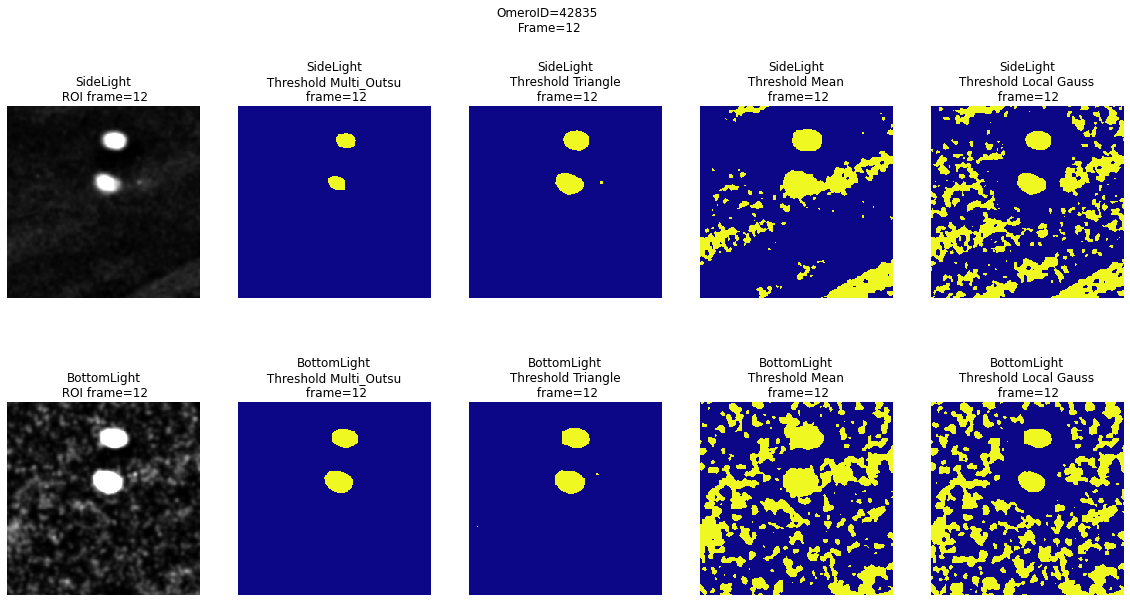

In [6]:
plot_threshold_panel(images_dict_42835,Frame)

##  Segmentation for the 2 hour (frame=24)

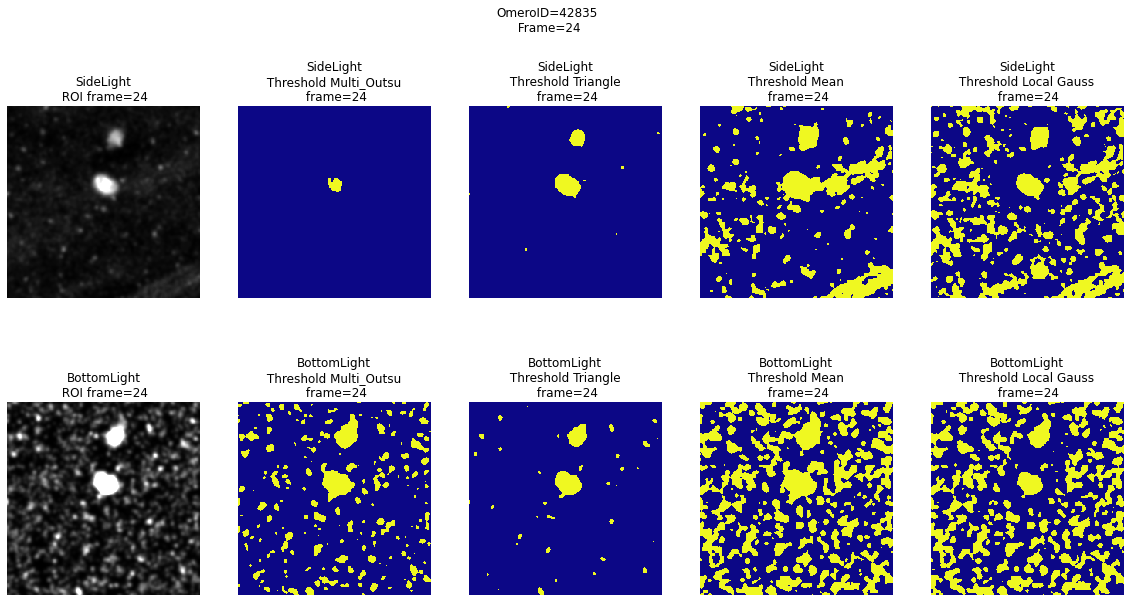

In [7]:
plot_threshold_panel(images_dict_42835,24)

##  Segmentation for the 3 hour (frame=36)

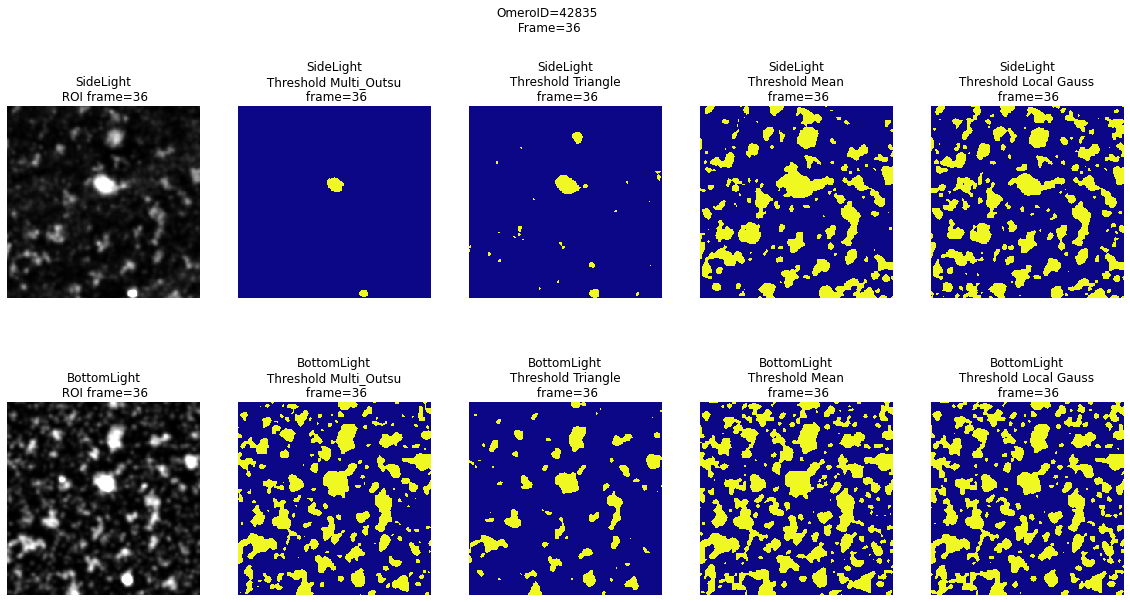

In [8]:
plot_threshold_panel(images_dict_42835,36)

##  Segmentation for the 4 hour (frame=48)

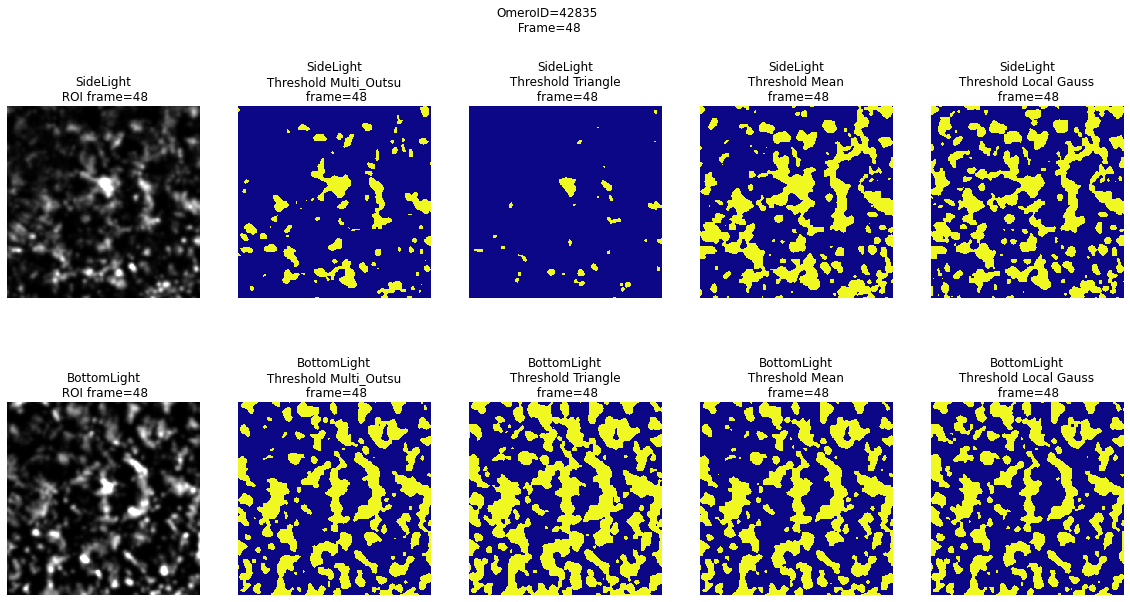

In [9]:
plot_threshold_panel(images_dict_42835,48)